In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
m2v_xgboost_d_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_d_fold_1.csv')
m2v_xgboost_d_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_d_fold_2.csv')
m2v_xgboost_d_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_d_fold_3.csv')
m2v_xgboost_d_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_d_fold_4.csv')
m2v_xgboost_d_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_d_fold_5.csv')
m2v_xgboost_d_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_d_fold_6.csv')
m2v_xgboost_d = pd.concat((m2v_xgboost_d_1, m2v_xgboost_d_2, m2v_xgboost_d_3, m2v_xgboost_d_4, m2v_xgboost_d_5, m2v_xgboost_d_6), axis=0)
m2v_xgboost_d = m2v_xgboost_d.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_xgboost_d['actual'], m2v_xgboost_d['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_xgboost_d['actual'], m2v_xgboost_d['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_xgboost_d['actual'], m2v_xgboost_d['predict']))

0.5951148169907016
0.8770205393444092
0.7612456962969962


In [4]:
len(m2v_xgboost_d)

1183

In [5]:
m2v_xgboost_d['residual']= m2v_xgboost_d['predict']-m2v_xgboost_d['actual']

In [6]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_xgboost_d['residual']**2).sum()/(len(m2v_xgboost_d)-2))
sdr

0.8777628336282383

In [7]:
m2v_xgboost_d['std_residual'] = m2v_xgboost_d['residual']/sdr
m2v_xgboost_d['std_residual']

0      1.106519
1      0.375563
2      0.053604
3      0.289331
4     -2.031641
         ...   
192   -1.406736
193    0.083172
194    0.636712
195   -0.669991
196   -0.084059
Name: std_residual, Length: 1183, dtype: float64

In [8]:
m2v_xgboost_d.to_csv('m2v_xgboost_d.csv')
m2v_xgboost_d

,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,10,10,10,COC(CC(OC)OC)OC,10,15.0,15.971261,0.971261,1.106519
1,23,23,23,FC(F)=C,23,15.0,15.329655,0.329655,0.375563
2,31,31,31,ClCC(Cl)CCl,31,17.8,17.847052,0.047052,0.053604
3,44,44,44,CCc1ccccc1CC,44,17.7,17.953964,0.253964,0.289331
4,49,49,49,SCCS,49,17.9,16.116701,-1.783299,-2.031641
...,...,...,...,...,...,...,...,...,...
192,1130,1132,1130,CCO[P](=O)(OCC)OCC,1130,16.7,15.465219,-1.234781,-1.406736
193,1153,1157,1153,CCCCOC=C,1153,15.2,15.273006,0.073006,0.083172
194,1154,1158,1154,CCCCSC=C,1154,16.0,16.558882,0.558882,0.636712
195,1157,1161,1157,ClC=C,1157,16.0,15.411907,-0.588093,-0.669991


In [9]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_xgboost_d_outliers = m2v_xgboost_d.loc[abs(m2v_xgboost_d['std_residual']) > n]
len(m2v_xgboost_d_outliers)

25

In [10]:
m2v_xgboost_d_outliers.to_csv('m2v_xgboost_d_outliers3.csv')

In [11]:
m2v_xgboost_d_outliers

,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
22,156,156,156,FC(F)(F)c1cc(Cl)ccc1Cl,156,20.0,17.043030,-2.956970,-3.368757
44,274,274,274,Cc1ccon1,274,19.4,16.370100,-3.029900,-3.451844
147,861,863,861,C[P](F)(F)=O,861,14.0,16.704575,2.704575,3.081214
188,1137,1141,1137,[O-][N+](=O)C([N+]([O-])=O)[N+]([O-])=O,1137,15.5,18.884907,3.384907,3.856289
1,3,3,3,BrC(Br)C(Br)Br,3,21.0,17.948227,-3.051773,-3.476763
92,535,535,535,C=[N+]=[N-],535,14.7,17.940290,3.240290,3.691532
134,767,769,767,IC(=C)C=C,767,19.9,17.199713,-2.700287,-3.076329
167,964,966,964,[O-][O+]=O,964,19.8,15.305203,-4.494797,-5.120742
32,196,196,196,OC(=O)C(Cl)=C,196,19.1,15.918331,-3.181669,-3.624748
70,404,404,404,NC(=O)NC(N)=O,404,20.0,16.989393,-3.010607,-3.429864


In [12]:
# Set the default text font size
plt.rc('font', size=22)

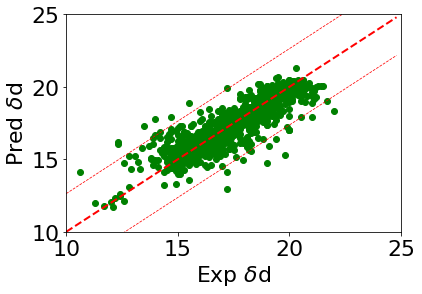

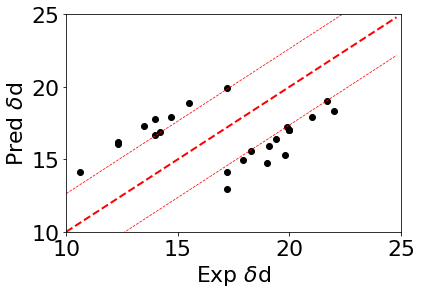

In [13]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d['actual'], y=m2v_xgboost_d['predict'], color='green')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d_outliers['actual'], y=m2v_xgboost_d_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

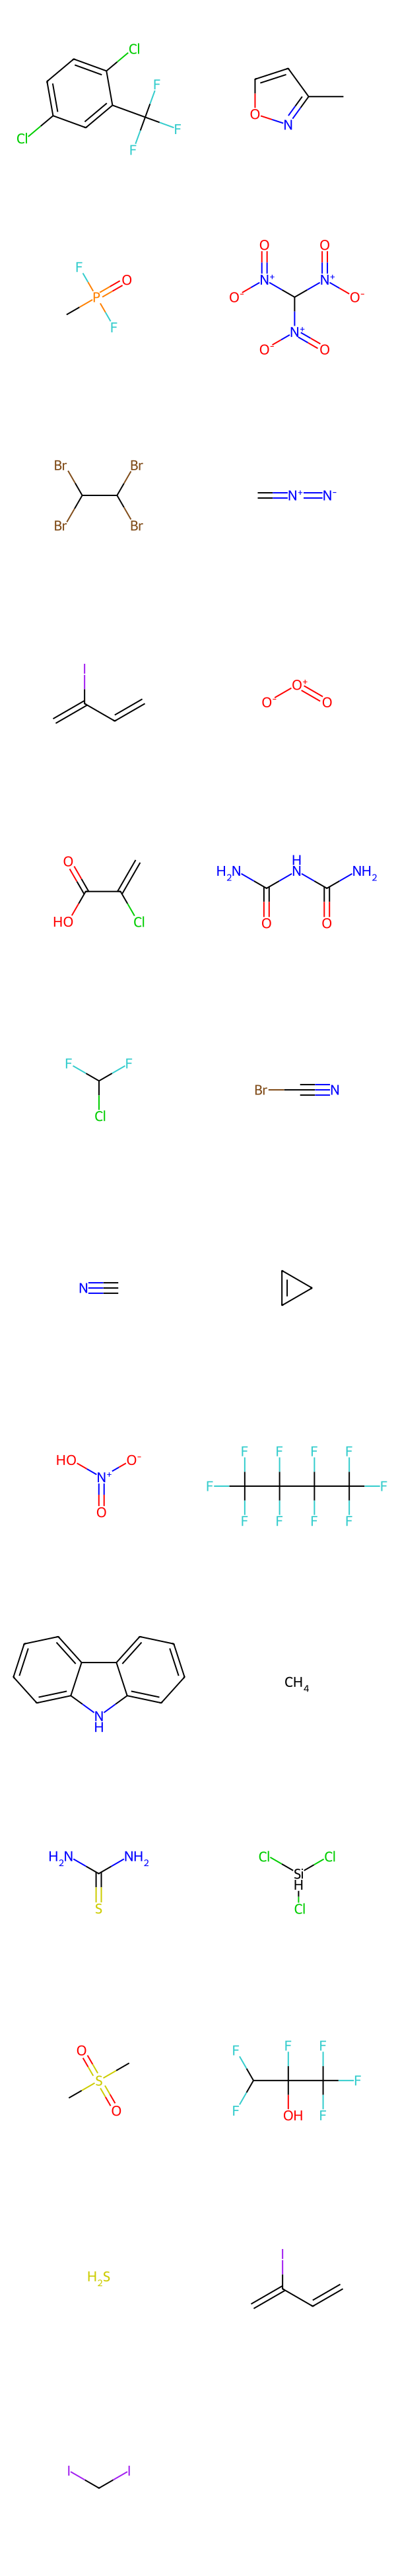

In [14]:
outliners = [Chem.MolFromSmiles(x) for x in m2v_xgboost_d_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=2, maxMols=50)

In [15]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_xgboost_d_outliers2 = m2v_xgboost_d.loc[abs(m2v_xgboost_d['std_residual']) > n]
len(m2v_xgboost_d_outliers2)

64

In [16]:
m2v_xgboost_d_outliers2

,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
4,49,49,49,SCCS,49,17.9,16.116701,-1.783299,-2.031641
6,54,54,54,FC(F)(F)c1cccc(c1)C(F)(F)F,54,17.0,14.523666,-2.476334,-2.821188
22,156,156,156,FC(F)(F)c1cc(Cl)ccc1Cl,156,20.0,17.043030,-2.956970,-3.368757
44,274,274,274,Cc1ccon1,274,19.4,16.370100,-3.029900,-3.451844
107,630,631,630,CCCCCCCCCCCCCCCCCCCC,630,16.5,14.634595,-1.865405,-2.125181
...,...,...,...,...,...,...,...,...,...
120,769,771,769,IC(=C)C=C,769,17.2,19.899580,2.699580,3.075523
142,878,880,878,ICI,878,22.0,18.299032,-3.700968,-4.216364
168,1028,1030,1028,CC1COC(=O)O1,1028,20.0,17.994670,-2.005330,-2.284592
172,1056,1058,1056,O=C1N[S](=O)(=O)c2ccccc12,1056,21.1,19.145046,-1.954954,-2.227201


In [17]:
m2v_xgboost_d_outliers2.to_csv('m2v_xgboost_d_outliers2.csv')

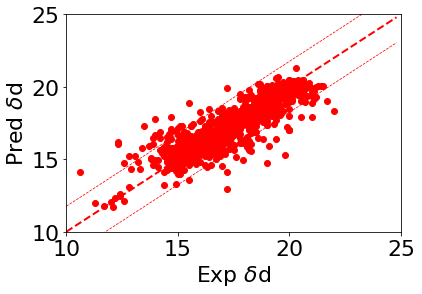

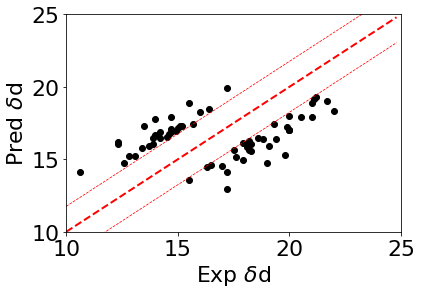

In [20]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d['actual'], y=m2v_xgboost_d['predict'], color='red')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d_outliers2['actual'], y=m2v_xgboost_d_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

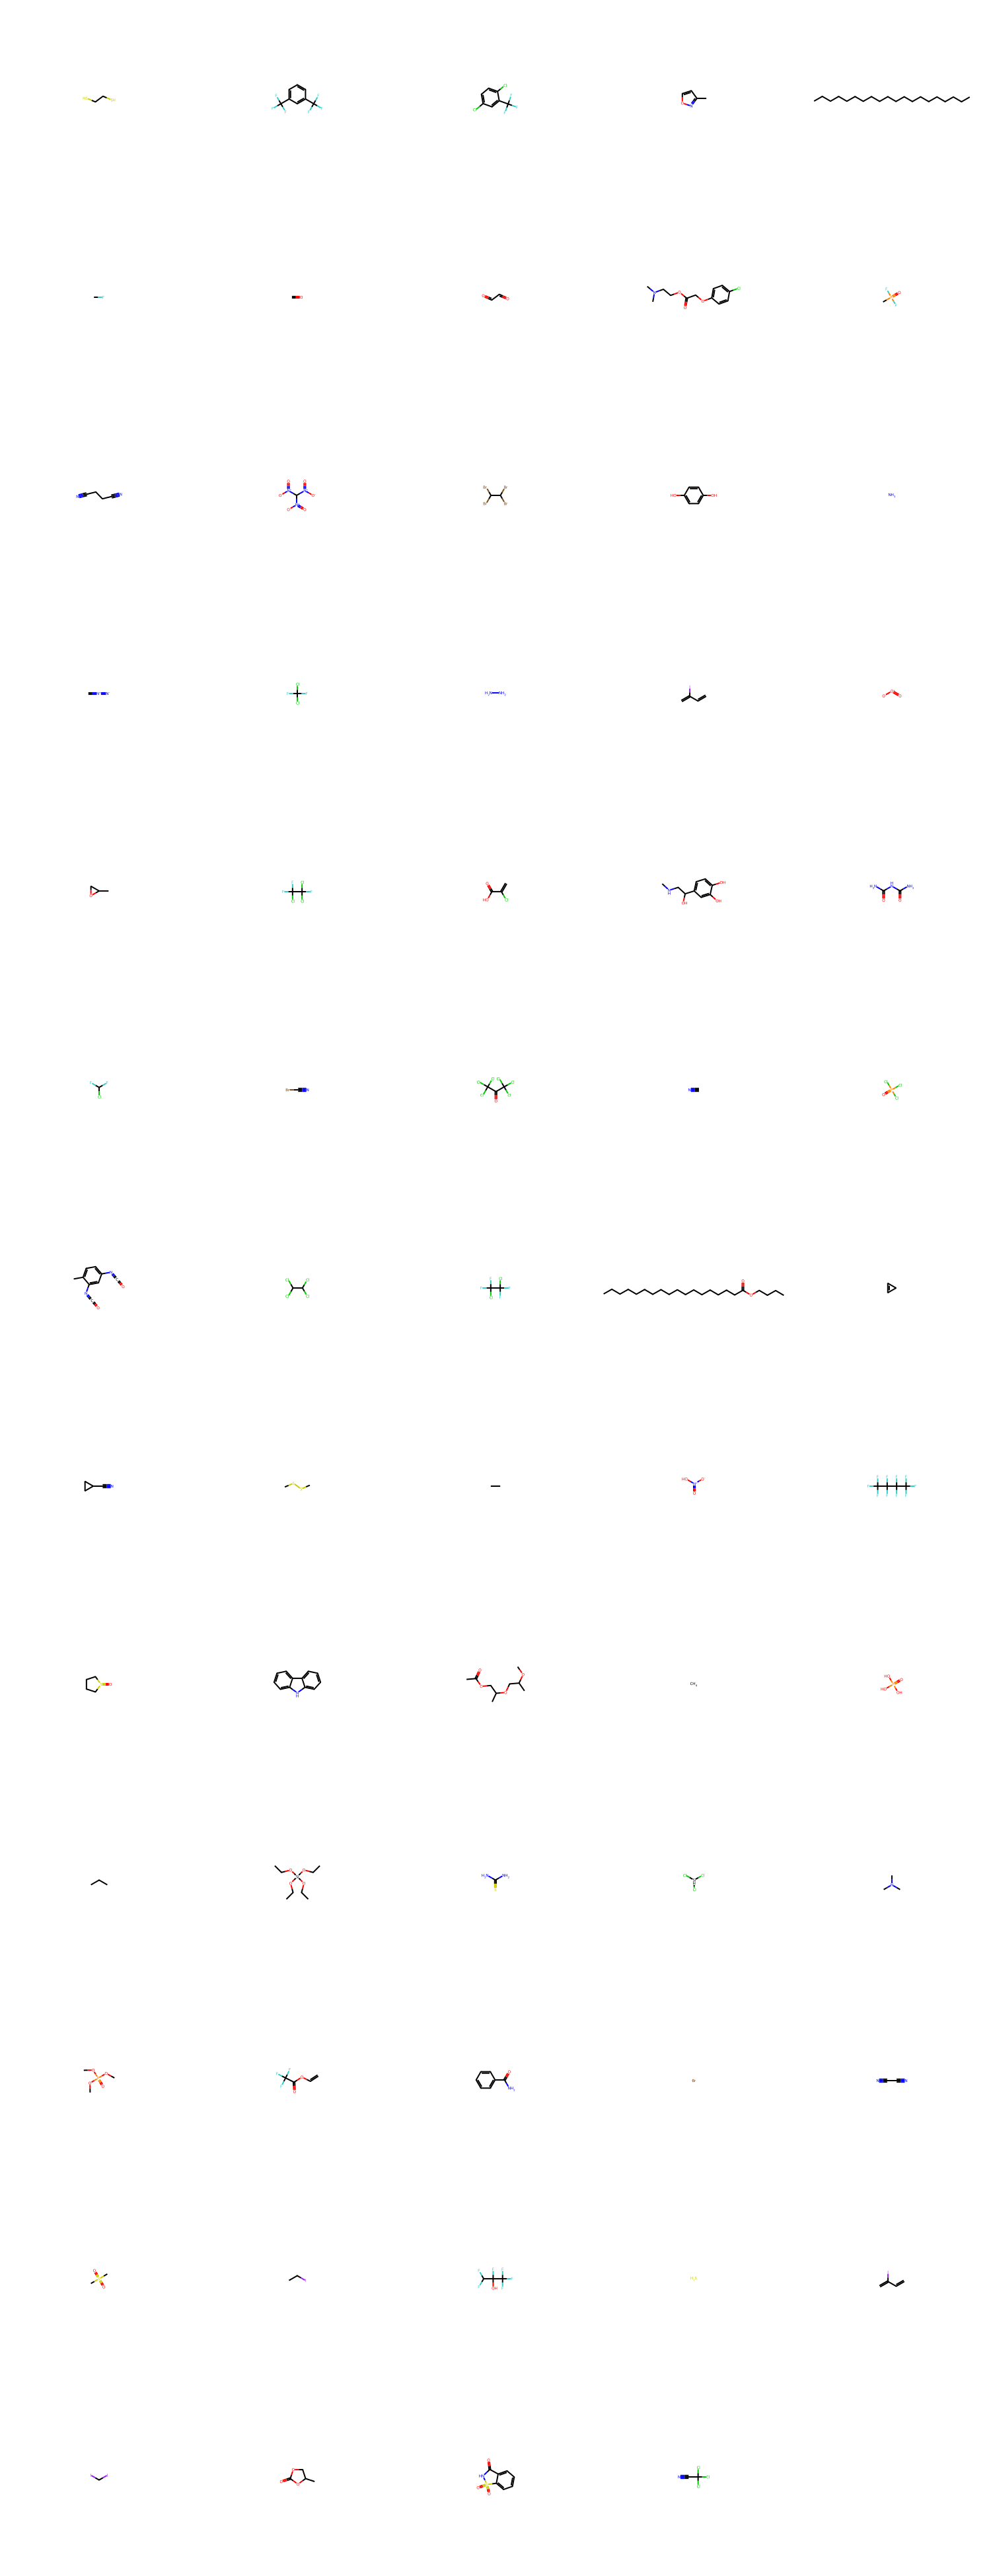

In [21]:
outliners2 = [Chem.MolFromSmiles(x) for x in m2v_xgboost_d_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [22]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 1
m2v_xgboost_d_outliers3 = m2v_xgboost_d.loc[abs(m2v_xgboost_d['std_residual']) > n]
len(m2v_xgboost_d_outliers3)

262

In [23]:
m2v_xgboost_d_outliers3

,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,10,10,10,COC(CC(OC)OC)OC,10,15.0,15.971261,0.971261,1.106519
4,49,49,49,SCCS,49,17.9,16.116701,-1.783299,-2.031641
5,51,51,51,[CH2]=[C]=[CH2],51,15.3,14.296284,-1.003716,-1.143493
6,54,54,54,FC(F)(F)c1cccc(c1)C(F)(F)F,54,17.0,14.523666,-2.476334,-2.821188
19,128,128,128,S1C=CSC1=C2SC=CS2,128,21.0,19.342312,-1.657688,-1.888537
...,...,...,...,...,...,...,...,...,...
174,1064,1066,1064,NCCCCNCCCN,1064,16.7,15.337107,-1.362893,-1.552689
177,1073,1075,1073,N#CSC#N,1073,18.1,16.521296,-1.578704,-1.798554
188,1114,1116,1114,ClC(Cl)(Cl)C#N,1114,16.4,18.491047,2.091047,2.382246
190,1124,1126,1124,OCCN(CCO)CCO,1124,17.3,16.152794,-1.147206,-1.306966


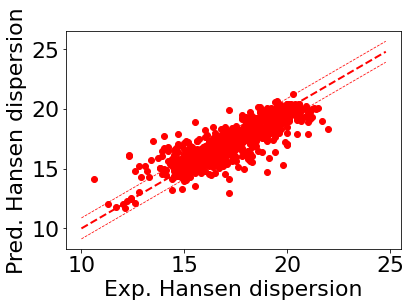

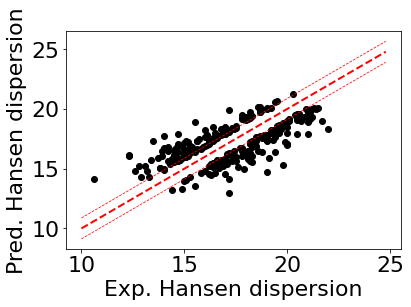

In [24]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d['actual'], y=m2v_xgboost_d['predict'], color='red')
plt.xlabel('Exp. Hansen dispersion')
plt.ylabel('Pred. Hansen dispersion')
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d_outliers3['actual'], y=m2v_xgboost_d_outliers3['predict'], color='black')
plt.xlabel('Exp. Hansen dispersion')
plt.ylabel('Pred. Hansen dispersion')
plt.show()

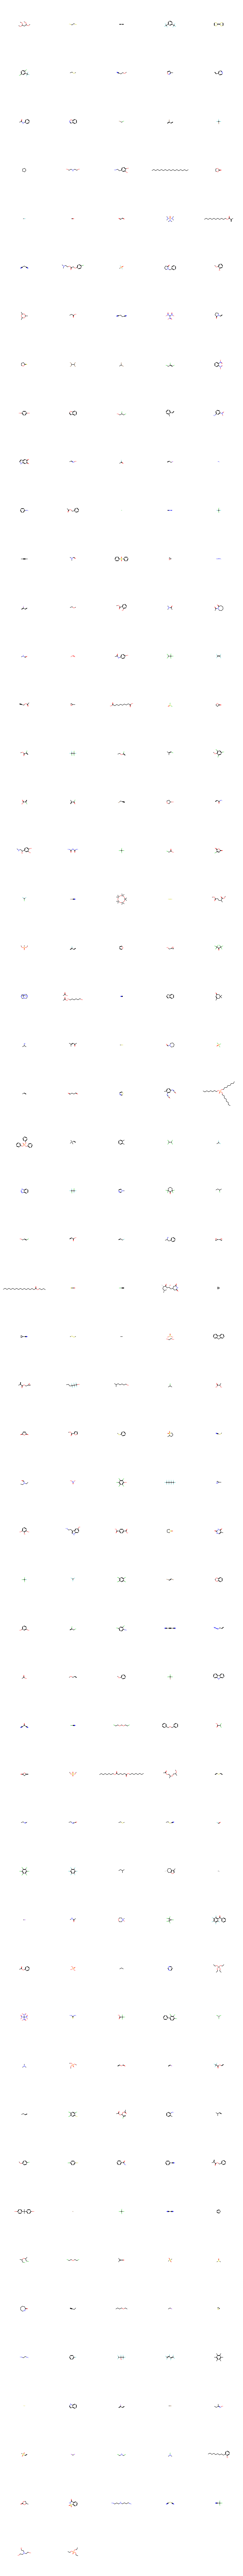

In [25]:
outliners3 = [Chem.MolFromSmiles(x) for x in m2v_xgboost_d_outliers3['SMILES']]
Draw.MolsToGridImage(outliners3, subImgSize=(300,300), molsPerRow=5, maxMols=500)

In [26]:
m2v_xgboost_d_outliers2['SMILES']

4                            SCCS
6      FC(F)(F)c1cccc(c1)C(F)(F)F
22         FC(F)(F)c1cc(Cl)ccc1Cl
44                       Cc1ccon1
107          CCCCCCCCCCCCCCCCCCCC
                  ...            
120                     IC(=C)C=C
142                           ICI
168                  CC1COC(=O)O1
172     O=C1N[S](=O)(=O)c2ccccc12
188                ClC(Cl)(Cl)C#N
Name: SMILES, Length: 64, dtype: object

In [27]:
m2v_xgboost_d_outliers2.to_csv('m2v_xgboost_d_outliers2.csv')
# m2v_xgboost_d_outliers3.to_csv('m2v_xgboost_d_outliers3.csv')

In [28]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 0.1
m2v_xgboost_d_outliers4 = m2v_xgboost_d.loc[abs(m2v_xgboost_d['std_residual']) < n]
len(m2v_xgboost_d_outliers4)

173

In [29]:
m2v_xgboost_d_outliers4

,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
2,31,31,31,ClCC(Cl)CCl,31,17.8,17.847052,0.047052,0.053604
8,58,58,58,CC(O)CCO,58,16.5,16.450207,-0.049793,-0.056727
9,59,59,59,ClCCCCl,59,18.0,17.922950,-0.077050,-0.087780
18,113,113,113,CC1(O)CCCCC1,113,17.1,17.072025,-0.027975,-0.031871
27,174,174,174,CC(C)Br,174,15.5,15.425673,-0.074327,-0.084678
...,...,...,...,...,...,...,...,...,...
178,1076,1078,1076,CC(=O)OC(C)(C)C,1076,15.0,14.926923,-0.073077,-0.083254
189,1123,1125,1123,CCCCCCCCCCCCCO,1123,16.2,16.260468,0.060468,0.068889
191,1126,1128,1126,CCN(CC)CC,1126,15.5,15.560755,0.060755,0.069216
193,1153,1157,1153,CCCCOC=C,1153,15.2,15.273006,0.073006,0.083172


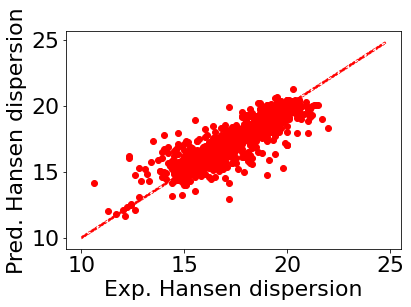

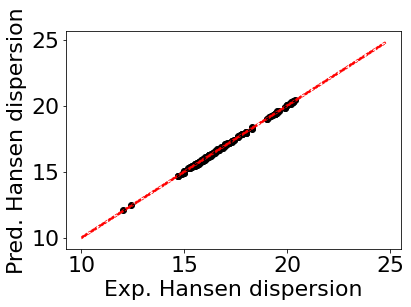

In [30]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d['actual'], y=m2v_xgboost_d['predict'], color='red')
plt.xlabel('Exp. Hansen dispersion')
plt.ylabel('Pred. Hansen dispersion')
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_d_outliers4['actual'], y=m2v_xgboost_d_outliers4['predict'], color='black')
plt.xlabel('Exp. Hansen dispersion')
plt.ylabel('Pred. Hansen dispersion')
plt.show()

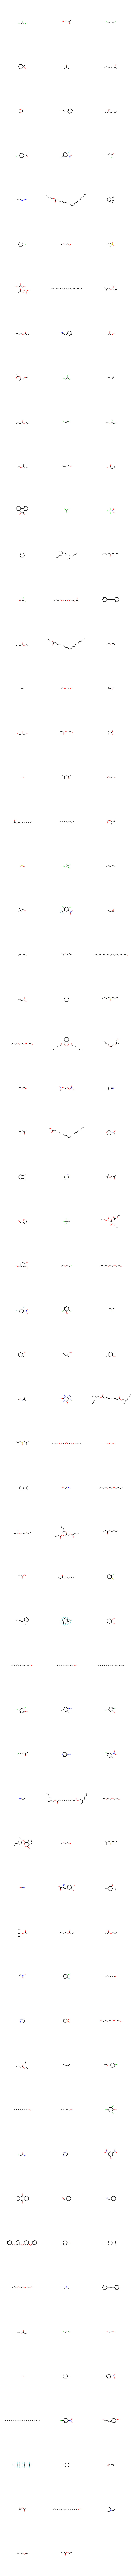

In [31]:
outliners4 = [Chem.MolFromSmiles(x) for x in m2v_xgboost_d_outliers4['SMILES']]
Draw.MolsToGridImage(outliners4, subImgSize=(300,300), molsPerRow=3, maxMols=200)

In [32]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_xgboost_d_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

In [33]:
# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
126.47056953225


In [34]:
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])

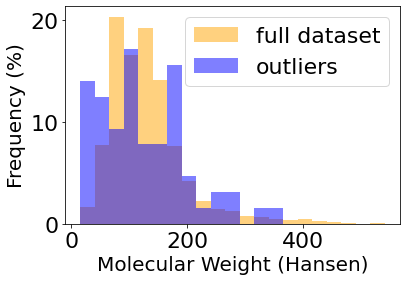

In [35]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()